In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import time 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("Walmart.csv") 
df.head() 

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
# Does null variables exist? 
df.isnull().any()

Store           False
Date            False
Weekly_Sales    False
Holiday_Flag    False
Temperature     False
Fuel_Price      False
CPI             False
Unemployment    False
dtype: bool

In [6]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
df.drop(["Date"],axis=1,inplace=True) 
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [8]:
# Numerical columns are separated from categorical variables.("Holiday_Flag")
num_col = [col for col in df.columns if not col=="Holiday_Flag"] 
print(num_col) 

['Store', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']


In [9]:
def outlier_thresholds(dataframe, col_name, q1=0.15, q3=0.85):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [10]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [11]:
def replace_with_thresholds(dataframe, variable, q1=0.15, q3=0.85):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.15, q3=0.85)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit 

In [12]:
for col in num_col:
    print(col, check_outlier(df, col))
    if check_outlier(df, col):
        replace_with_thresholds(df, col)


Store False
Weekly_Sales True
Temperature False
Fuel_Price False
CPI False
Unemployment True


In [13]:
for col in num_col:
    print(col, check_outlier(df, col))

Store False
Weekly_Sales False
Temperature False
Fuel_Price False
CPI False
Unemployment False


In [14]:
scale = StandardScaler() 
df[num_col] = scale.fit_transform(df[num_col]) 
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,-1.693979,1.058418,0,-0.995136,-1.713800,1.004175,0.072167
1,-1.693979,1.055344,1,-1.201170,-1.766089,1.007880,0.072167
2,-1.693979,1.002160,0,-1.124178,-1.840166,1.009074,0.072167
3,-1.693979,0.643501,0,-0.760907,-1.737766,1.009849,0.072167
4,-1.693979,0.900788,0,-0.767955,-1.598328,1.010624,0.072167


In [15]:
y = df["Weekly_Sales"] 
x = df.drop("Weekly_Sales",axis=1)
print(x,y)

         Store  Holiday_Flag  Temperature  Fuel_Price       CPI  Unemployment
0    -1.693979             0    -0.995136   -1.713800  1.004175      0.072167
1    -1.693979             1    -1.201170   -1.766089  1.007880      0.072167
2    -1.693979             0    -1.124178   -1.840166  1.009074      0.072167
3    -1.693979             0    -0.760907   -1.737766  1.009849      0.072167
4    -1.693979             0    -0.767955   -1.598328  1.010624      0.072167
...        ...           ...          ...         ...       ...           ...
6430  1.693979             0     0.228602    1.390883  0.519270      0.392766
6431  1.693979             0     0.229144    1.364738  0.523256      0.383336
6432  1.693979             0    -0.335825    1.397419  0.527241      0.383336
6433  1.693979             0    -0.227385    1.329879  0.527332      0.383336
6434  1.693979             0    -0.098343    1.140330  0.526775      0.383336

[6435 rows x 6 columns] 0       1.058418
1       1.055344
2    

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.30,random_state=17)

In [17]:
print("X_train shape:",X_train.shape,"\nY_train shape:",Y_train.shape
     ,"\nX_test shape:",X_test.shape,"\nY_test shape:",Y_test.shape)

X_train shape: (4504, 6) 
Y_train shape: (4504,) 
X_test shape: (1931, 6) 
Y_test shape: (1931,)


In [18]:
type(X_train)

pandas.core.frame.DataFrame

In [19]:
# In our example we should convert the dataframe to numpy array.
X_train = X_train.to_numpy() 

In [20]:
type(X_train)

numpy.ndarray

In [21]:
X_test = X_test.to_numpy() 
Y_train = Y_train.to_numpy() 

In [22]:
Y_test = Y_test.to_numpy()  

In [23]:
type(X_test)

numpy.ndarray

In [24]:
type(Y_test)

numpy.ndarray

In [25]:
type(Y_train)

numpy.ndarray

In [26]:
X_train.shape

(4504, 6)

This is our dataset. Dataframe's columns converted to numpy array with few lines of code.

# Gradient Descent

Gradient Descent,is an optimization algorithm which updates parameters of cost function step by step.If we are training a model with very large set,it takes really long time. Therefore, an algorithm which called mini-batch gradient descent has been developed. Actually, we can say that gradient descent has 3 types. 
* **Batch Gradient Descent**
* **Mini-Batch Gradient Descent**
* **Stochastic gradient descent**

Their differences will be explained with graphs and by keeping time in this notebook.

## Batch Gradient Descent 

In batch gradient descent,whole dataset is used to calculate error.

In [27]:
def initilaze_parameters():  
    n= X_train.shape[1]
    w = np.random.randn((n))
    b= 0.
    return w,b

In [28]:
w,b = initilaze_parameters() 
print(w,b)

[ 0.1818249   1.59119381  1.10710607  1.02188031  0.94630094 -0.58467324] 0.0


These are the parameters we will use to calculate cost function.Let's implement single prediction with vectorization. 

In [29]:
def single_predict_vector(X_train,w,b): 
    p = np.dot(X_train,w) + b
    return p

In [30]:
def compute_cost(x,y,w,b): 
    m = x.shape[0]
    cost = 0.
    for i in range(x.shape[0]):
        y_hat = np.dot(x[i],w) + b
        cost = cost + (y_hat - y[i])**2 
    cost = cost / (2*m)
    return cost

In [31]:
print(compute_cost(X_train,Y_train,w,b))

2.619990133274207


In [32]:
def back_prob(x,y,w,b): 
    m,n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    for i in range(m): 
        err = (np.dot(x[i],w) + b) - y[i]
        for j in range(n) : 
            dj_dw[j] = dj_dw[j] + err * x[i,j]
        dj_db = dj_db + err
        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_dw,dj_db

In [35]:
def batch_gradient_descent(x,y,w,b,iteration=1000,learning_rate=0.01): 
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    start_time = time.time()
    for i in range(iteration):  
        dj_dw,dj_db = back_prob(x,y,w,b)
        b = b - learning_rate * dj_db 
        w = w - learning_rate * dj_dw  
        J_history.append(compute_cost(x,y,w,b)) 
        if i % 100 == 0 : 
            print(f"Iteration:{i} Cost {J_history[-1]}") 
    finish_time = time.time()       
    print("Running time :",finish_time - start_time)
    return w,b,J_history # to get graph

In [36]:
w_final,b_final,J_hist = batch_gradient_descent(X_train,Y_train,w,b) 
print(f"Final value of parameters:{w_final},{b_final:0.3f}")

Iteration:0 Cost 2.573219956114519
Iteration:100 Cost 0.7355860473745551
Iteration:200 Cost 0.5208065833779587
Iteration:300 Cost 0.48638421364633533
Iteration:400 Cost 0.4758077547756337
Iteration:500 Cost 0.46946970351436934
Iteration:600 Cost 0.4644300643036391
Iteration:700 Cost 0.4601155991151221
Iteration:800 Cost 0.45635451867518684
Iteration:900 Cost 0.45305997430211237
Running time : 78.6119692325592
Final value of parameters:[-0.35509256  0.90747399  0.00458068  0.02108743 -0.17166211 -0.08758219],-0.061


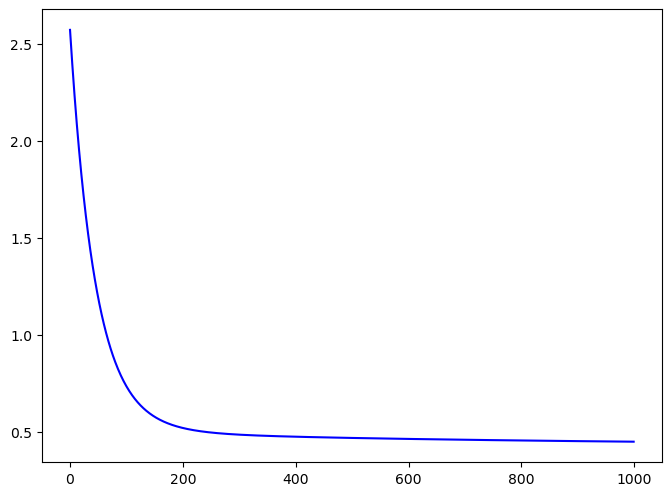

In [37]:
fig = plt.figure(figsize=(8,6), dpi=100) 
plt.plot(J_hist,c="b") 
plt.show()

In [38]:
def get_predict(X,w_final,b_final): 
    predict = np.dot(X,w_final) + b_final 
    return predict

Our cost function decreases normally and running time is 136 seconds(It can be change). In next cells, mini_batch gradient descent and stochastic dradient descent will be implemented. Then running time and cost function will be compared. 

## Mini-Batch Gradient Descent

Parameters are updated after computing the gradient of  the error with respect to a subset of the training set. We expect it will run faster. 

In [39]:
def mini_batches(X,Y,batch_size=32,seed = 0): 
    n = int(X_train.shape[0] / 32)
    mini_batches_x = []  
    mini_batches_y = []  
    for i in range(n) : 
        tmp1 = i*batch_size
        tmp2 = (i+1)*batch_size
        mini_batches_x.append(X[tmp1:tmp2])
        mini_batches_y.append(Y[tmp1:tmp2])  
    return mini_batches_x,mini_batches_y
    

In [40]:
mini_batches_x,mini_batches_y = mini_batches(X_train,Y_train)

In [41]:
print(mini_batches_x)

[array([[ 0.1539981 ,  0.        ,  0.35439139,  0.75033799,  0.94995301,
        -0.38931663],
       [-0.3079962 ,  0.        ,  0.11365617,  1.26015964, -0.89607673,
        -0.09423315],
       [ 0.3079962 ,  0.        ,  0.93074622,  1.21222769, -0.81003307,
        -0.06982775],
       [ 0.9239886 ,  0.        ,  0.10606542, -1.06671865, -0.90951549,
         0.59632875],
       [-1.23198481,  0.        , -1.11658757, -1.2802337 ,  0.45619282,
         0.54751795],
       [-1.61698006,  0.        ,  0.88086415,  0.56950382,  1.27637342,
        -0.78257637],
       [ 0.23099715,  0.        , -0.04195421,  0.99435519, -0.91812551,
        -0.11586521],
       [-0.3079962 ,  0.        , -1.74011348, -0.97956965, -1.01493482,
         0.20750635],
       [ 0.69299145,  0.        ,  0.01172324,  0.51721442,  0.58860041,
         0.3583761 ],
       [-0.53899335,  0.        , -1.47552162, -1.45235298,  0.46135152,
        -0.51966365],
       [ 0.23099715,  0.        , -1.99331923,  0

In [42]:
len(mini_batches_x[0]) # Mini batch size

32

In [43]:
len(mini_batches_x) # Number of Mini batches

140

In [44]:
print(mini_batches_y)

[array([-0.6155409 ,  0.56530347,  1.26850673,  0.2680442 , -1.15523935,
        1.47179885,  0.0412302 ,  0.83192505,  0.16959113, -0.96219559,
       -0.14379202, -0.31735652,  1.91217015,  0.60873218, -1.13439976,
       -0.82115879, -0.94047183,  0.8182055 ,  1.14596846, -0.40958126,
       -1.14237254,  0.86945689, -0.06680316,  1.76718308,  1.37049771,
        2.7706188 , -1.12521183,  1.40221894, -1.13875106, -1.31940937,
       -0.2989211 , -0.43754409]), array([-0.53574754,  0.40074598,  1.86809675, -1.03014503, -1.04175884,
        0.80553536,  1.05841791,  1.62402425,  0.42744769,  1.29011917,
        1.82128326,  2.05141011,  1.8554813 , -0.13211391,  1.51879897,
       -0.1252538 ,  1.52734746,  2.44869467,  1.17097363,  2.592901  ,
       -1.32682903, -1.19586592, -0.75819839, -0.94878089, -0.20250836,
        0.83450142, -1.01719821, -0.33708254, -0.99673889,  0.31575061,
       -0.12475575,  1.7855533 ]), array([-0.47026962, -1.23724199, -0.31608481, -1.07139045,  1.149

In [45]:
len(mini_batches_y[0]) # Mini batch size

32

In [46]:
len(mini_batches_y) # Number of Mini batches

140

In [50]:
w,b = initilaze_parameters()

In [77]:
def mini_batch_gradient_descent(mini_batches_x,mini_batches_y,w,b,learning_rate=0.01,epoch=20):   
    J_history = [] 
    start_time = time.time()
    for j in range(epoch) : 
        for i in range(len(mini_batches_x)) : 
            dj_dw, dj_db = back_prob(mini_batches_x[i],mini_batches_y[i],w,b) 
            b = b - learning_rate * dj_db 
            w = w - learning_rate * dj_dw  
            J_history.append([compute_cost(mini_batches_x[i],mini_batches_y[i],w,b)])
        print(f"Epoch:{j} Cost {J_history[-1]}")
    finish_time = time.time() 
    print("Running time:",finish_time-start_time) 
    return w,b,J_history 

In [78]:
w_last,b_last,Cost_hist = mini_batch_gradient_descent(mini_batches_x,mini_batches_y,w,b)

Epoch:0 Cost [0.7496460477660143]
Epoch:1 Cost [0.45531815894240785]
Epoch:2 Cost [0.42216295997771897]
Epoch:3 Cost [0.4129476859513893]
Epoch:4 Cost [0.40853780767331793]
Epoch:5 Cost [0.40598517774915815]
Epoch:6 Cost [0.4043704755341678]
Epoch:7 Cost [0.4033001125211124]
Epoch:8 Cost [0.4025804179333867]
Epoch:9 Cost [0.40210443438166077]
Epoch:10 Cost [0.4018061834001374]
Epoch:11 Cost [0.4016409886930732]
Epoch:12 Cost [0.4015764805537976]
Epoch:13 Cost [0.40158816108507217]
Epoch:14 Cost [0.4016570109632756]
Epoch:15 Cost [0.4017680648481001]
Epoch:16 Cost [0.40190948024346185]
Epoch:17 Cost [0.4020718796307718]
Epoch:18 Cost [0.40224785827866333]
Epoch:19 Cost [0.40243160165015945]
Running time: 0.8938694000244141


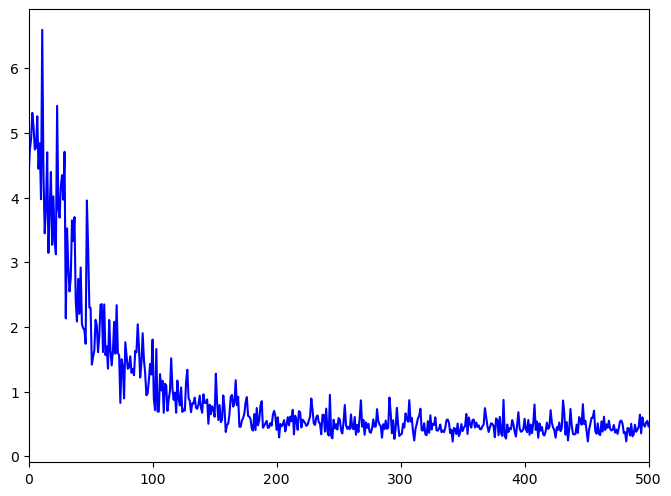

In [83]:
fig = plt.figure(figsize=(8,6), dpi=100) 
plt.xlim(0,500)
plt.plot(Cost_hist,c="b") 
plt.show()

# Stochastic gradient descent

The algorithm calculates the gradient for one observation picked at random, instead of calculating the gradient for the entire dataset.Therefore it is not optimum but gennerally it gives good result.However, we lose advantage of vectorization 

In [113]:
w,b = initilaze_parameters()

In [85]:
def compute_loss(X,Y,w,b): 
    loss = ((np.dot(w,X) + b) -Y )**2
    return loss

In [88]:
type(X_train)
X_train.shape

(4504, 6)

In [117]:
def stochastic_gradient_descent(X_train,Y_train,w,b,learning_rate=0.01,epoch=20): 
    C_history = [] 
    start_time = time.time()
    for i in range(epoch): 
        for j in range(X_train.shape[0]):
            random_index = np.random.randint(0, len(X_train), 1) # random sample 
            dj_dw, dj_db = back_prob(X_train[random_index],Y_train[random_index],w,b) 
            b = b - learning_rate * dj_db 
            w = w - learning_rate * dj_dw  
            cost = compute_loss(X_train[j],Y_train[j],w,b)
        C_history.append(cost)
        print(f"Iter:{i} Cost {C_history[-1]}") 
    finish_time = time.time() 
    print("Running time:",finish_time-start_time)
    return w,b,C_history

In [118]:
ww,bb,Costes = stochastic_gradient_descent(X_train,Y_train,w,b)

Iter:0 Cost 1.1060018954945978
Iter:1 Cost 1.1261687075354647
Iter:2 Cost 1.609043976096658
Iter:3 Cost 1.2164546616570253
Iter:4 Cost 1.4618271521672777
Iter:5 Cost 0.927654134881402
Iter:6 Cost 1.02492401568041
Iter:7 Cost 0.9968648880726981
Iter:8 Cost 1.2615917964355372
Iter:9 Cost 0.9902212066624991
Iter:10 Cost 1.403331649028627
Iter:11 Cost 1.4986680586723482
Iter:12 Cost 1.120854832793323
Iter:13 Cost 1.2759371522392295
Iter:14 Cost 1.563484766042253
Iter:15 Cost 1.148209616337258
Iter:16 Cost 0.9292269360344243
Iter:17 Cost 1.4379134707875691
Iter:18 Cost 1.1888527178146526
Iter:19 Cost 0.9673198791737982
Running time: 3.168400526046753


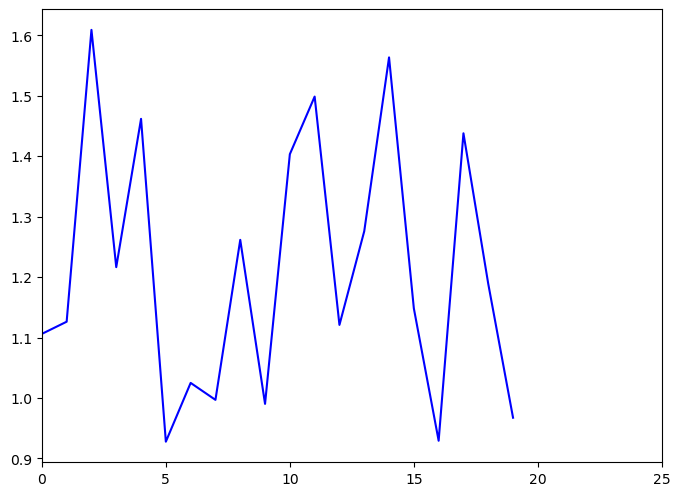

In [119]:
fig = plt.figure(figsize=(8,6), dpi=100) 
plt.xlim(0,25)
plt.plot(Costes,c="b") 
plt.show()